In [47]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FFMpegWriter
from matplotlib.offsetbox import AnchoredText
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [50]:
root = Path('/Volumes/krauss/Lisa/GMR/Array/250318/sensor_2_Scarnosus/loc1_sensor2_1')

## Plot gratings 1 and 2 separately (for comparison)

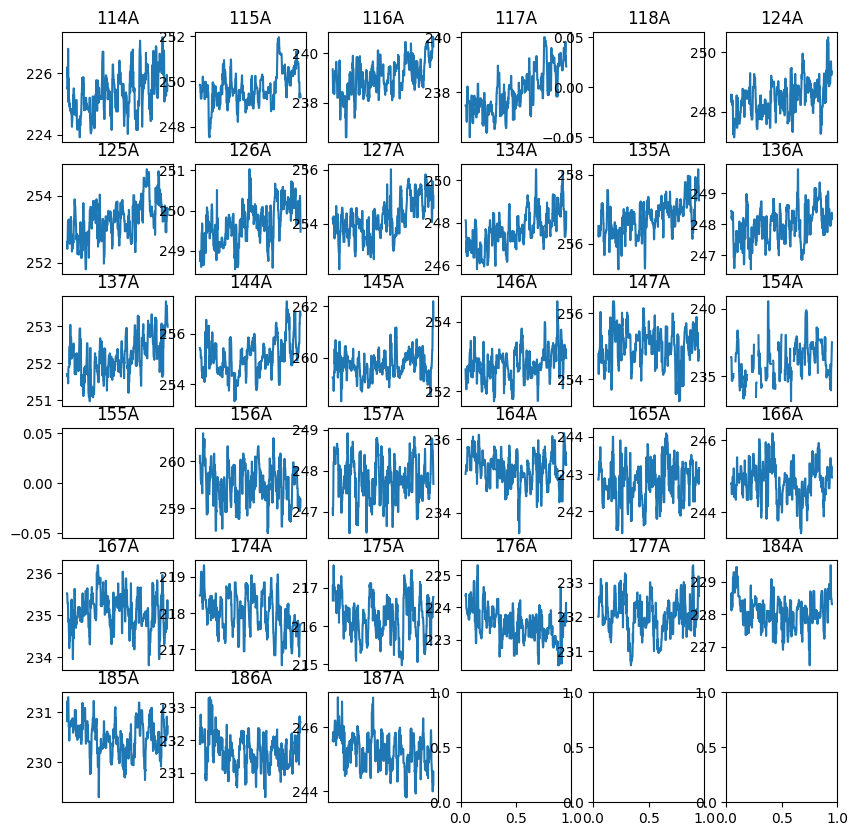

In [51]:
parent_filepath = Path(root, 'Results', '1_gratings')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

paired_prefixes = []
for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'{p}_S.csv', f'{p}_N.csv'))

num_sub_plots = int(np.ceil(np.sqrt(len(paired_prefixes))))
fig, ax = plt.subplots(num_sub_plots, num_sub_plots, figsize=(10, 10))
ax = ax.ravel()
for idx, (p0, p1) in enumerate(paired_prefixes):
    df1 = pd.read_csv(Path(parent_filepath, p0))
    df1 = df1.set_index('Time Stamp')
    df2 = pd.read_csv(Path(parent_filepath, p1))
    df2 = df2.set_index('Time Stamp')
    df3 = df1['mu_Mean'] + df2['mu_Mean']
    try:
        # ax[idx].plot(df1['mu_Median'].rolling(window=10).median())
        # ax[idx].plot(df2['mu_Median'].rolling(window=10).median())
        ax[idx].plot(df3.rolling(window=10).median())
        ax[idx].set_title(df1['ROI-label'].iloc[0][:-2])
        # ax[idx].set_ylim([0, 181])
        ax[idx].set_xticks([])
    except Exception as e:
        print(f'Exception: {e}')
plt.show()

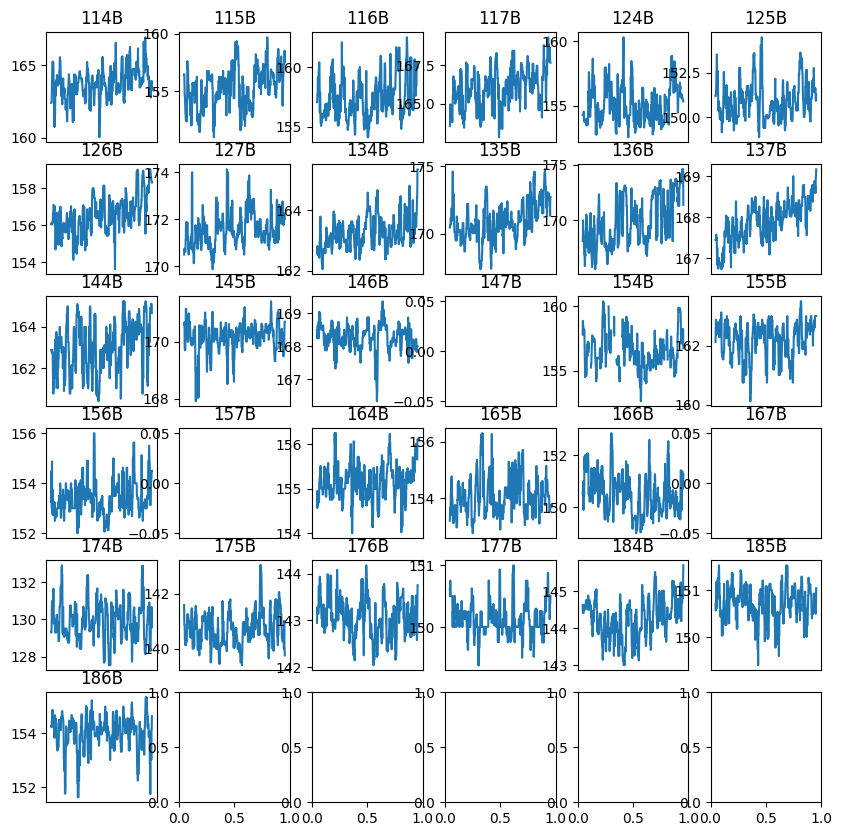

In [52]:
parent_filepath = Path(root, 'Results', '2_gratings')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

paired_prefixes = []
for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'{p}_S.csv', f'{p}_N.csv'))

num_sub_plots = int(np.ceil(np.sqrt(len(paired_prefixes))))
fig, ax = plt.subplots(num_sub_plots, num_sub_plots, figsize=(10, 10))
ax = ax.ravel()
for idx, (p0, p1) in enumerate(paired_prefixes):
    df1 = pd.read_csv(Path(parent_filepath, p0))
    df1 = df1.set_index('Time Stamp')
    df2 = pd.read_csv(Path(parent_filepath, p1))
    df2 = df2.set_index('Time Stamp')
    df3 = df1['mu_Median'] + df2['mu_Median']
    try:
        # ax[idx].plot(df1['mu_Median'].rolling(window=10).median())
        # ax[idx].plot(df2['mu_Median'].rolling(window=10).median())
        ax[idx].plot(df3.rolling(window=10).median())
        ax[idx].set_title(df1['ROI-label'].iloc[0][:-2])
        # ax[idx].set_ylim([0, 181])
        ax[idx].set_xticks([])
    except Exception as e:
        print(f'Exception: {e}')
plt.show()

### Available variables for plotting

In [36]:
df1.columns

Index(['Sensor ID', 'Setup ID', 'Reader ID', 'Root Path', 'File Path', 'Error',
       'Processed', 'Brightness', 'Contrast', 'Analysis-method',
       'amplitude_Mean', 'amplitude_STD', 'amplitude_LQ', 'amplitude_Median',
       'amplitude_UQ', 'amplitude_Max', 'mu_Mean', 'mu_STD', 'mu_LQ',
       'mu_Median', 'mu_UQ', 'mu_Max', 'sigma_Mean', 'sigma_STD', 'sigma_LQ',
       'sigma_Median', 'sigma_UQ', 'sigma_Max', 'offset_Mean', 'offset_STD',
       'offset_LQ', 'offset_Median', 'offset_UQ', 'offset_Max', 'error_Mean',
       'error_STD', 'error_LQ', 'error_Median', 'error_UQ', 'error_Max',
       'ROI-label'],
      dtype='object')

## Plot sub-set of gratings (by name)

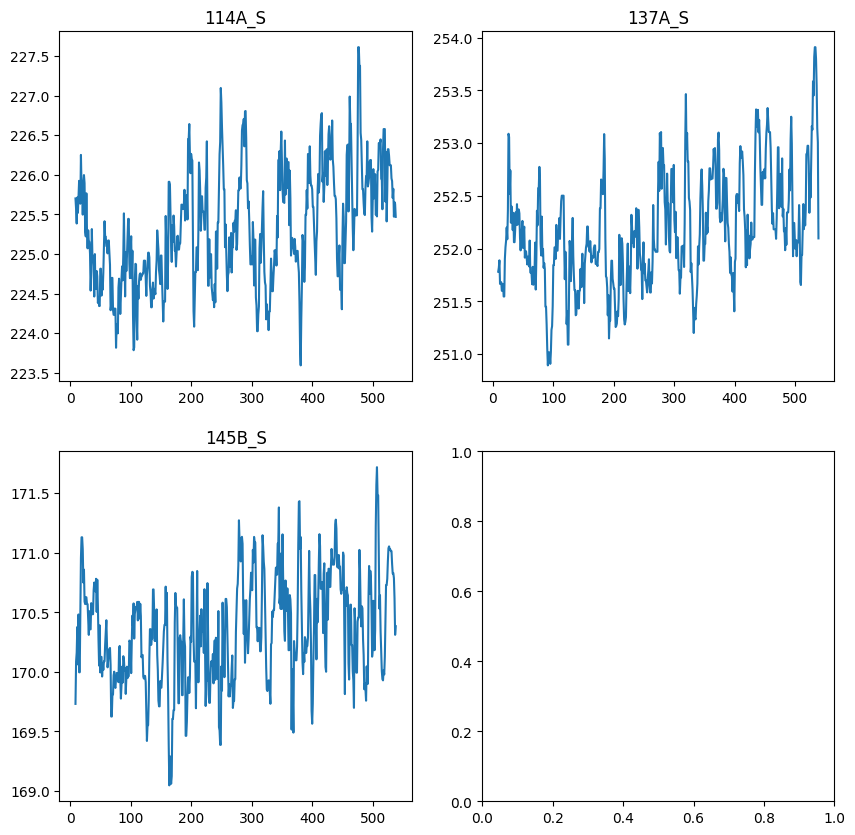

In [53]:
# List of gratings to plot
gratings_to_plot = ['114A',
                    '137A',
                    '145B']

paired_prefixes = []
for g in gratings_to_plot:
    if 'A' in g:
        paired_prefixes.append((f'1_gratings/{g}_S.csv', f'1_gratings/{g}_N.csv'))
    else:
        paired_prefixes.append((f'2_gratings/{g}_S.csv', f'2_gratings/{g}_N.csv'))

parent_filepath = Path(root, 'Results')
filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

num_sub_plots = int(np.ceil(np.sqrt(len(paired_prefixes))))
fig, ax = plt.subplots(num_sub_plots, num_sub_plots, figsize=(10, 10))
ax = ax.ravel()
for idx, (p0, p1) in enumerate(paired_prefixes):
    df1 = pd.read_csv(Path(parent_filepath, p0))
    df1 = df1.set_index('Time Stamp')
    df2 = pd.read_csv(Path(parent_filepath, p1))
    df2 = df2.set_index('Time Stamp')
    df3 = df1['mu_Mean'].rolling(window=10).median() + df2['mu_Mean'].rolling(window=10).median()
    try:
        # ax[idx].plot(df1['mu_Median'].rolling(window=10).median())
        # ax[idx].plot(df2['mu_Median'].rolling(window=10).median())
        ax[idx].plot(df3)
        ax[idx].set_title(df1['ROI-label'].iloc[0])
        # ax[idx].set_ylim([0, 181])
        # ax[idx].set_xticks([])
    except Exception as e:
        print(f'Exception: {e}')
plt.show()

## Plot all gratings located as on chip

Exception: 'x' has size 521, but 'y1' has an unequal size of 539
Exception: 'x' has size 8, but 'y1' has an unequal size of 539
Exception: 'x' has size 529, but 'y1' has an unequal size of 539
Exception: 'x' has size 59, but 'y1' has an unequal size of 538


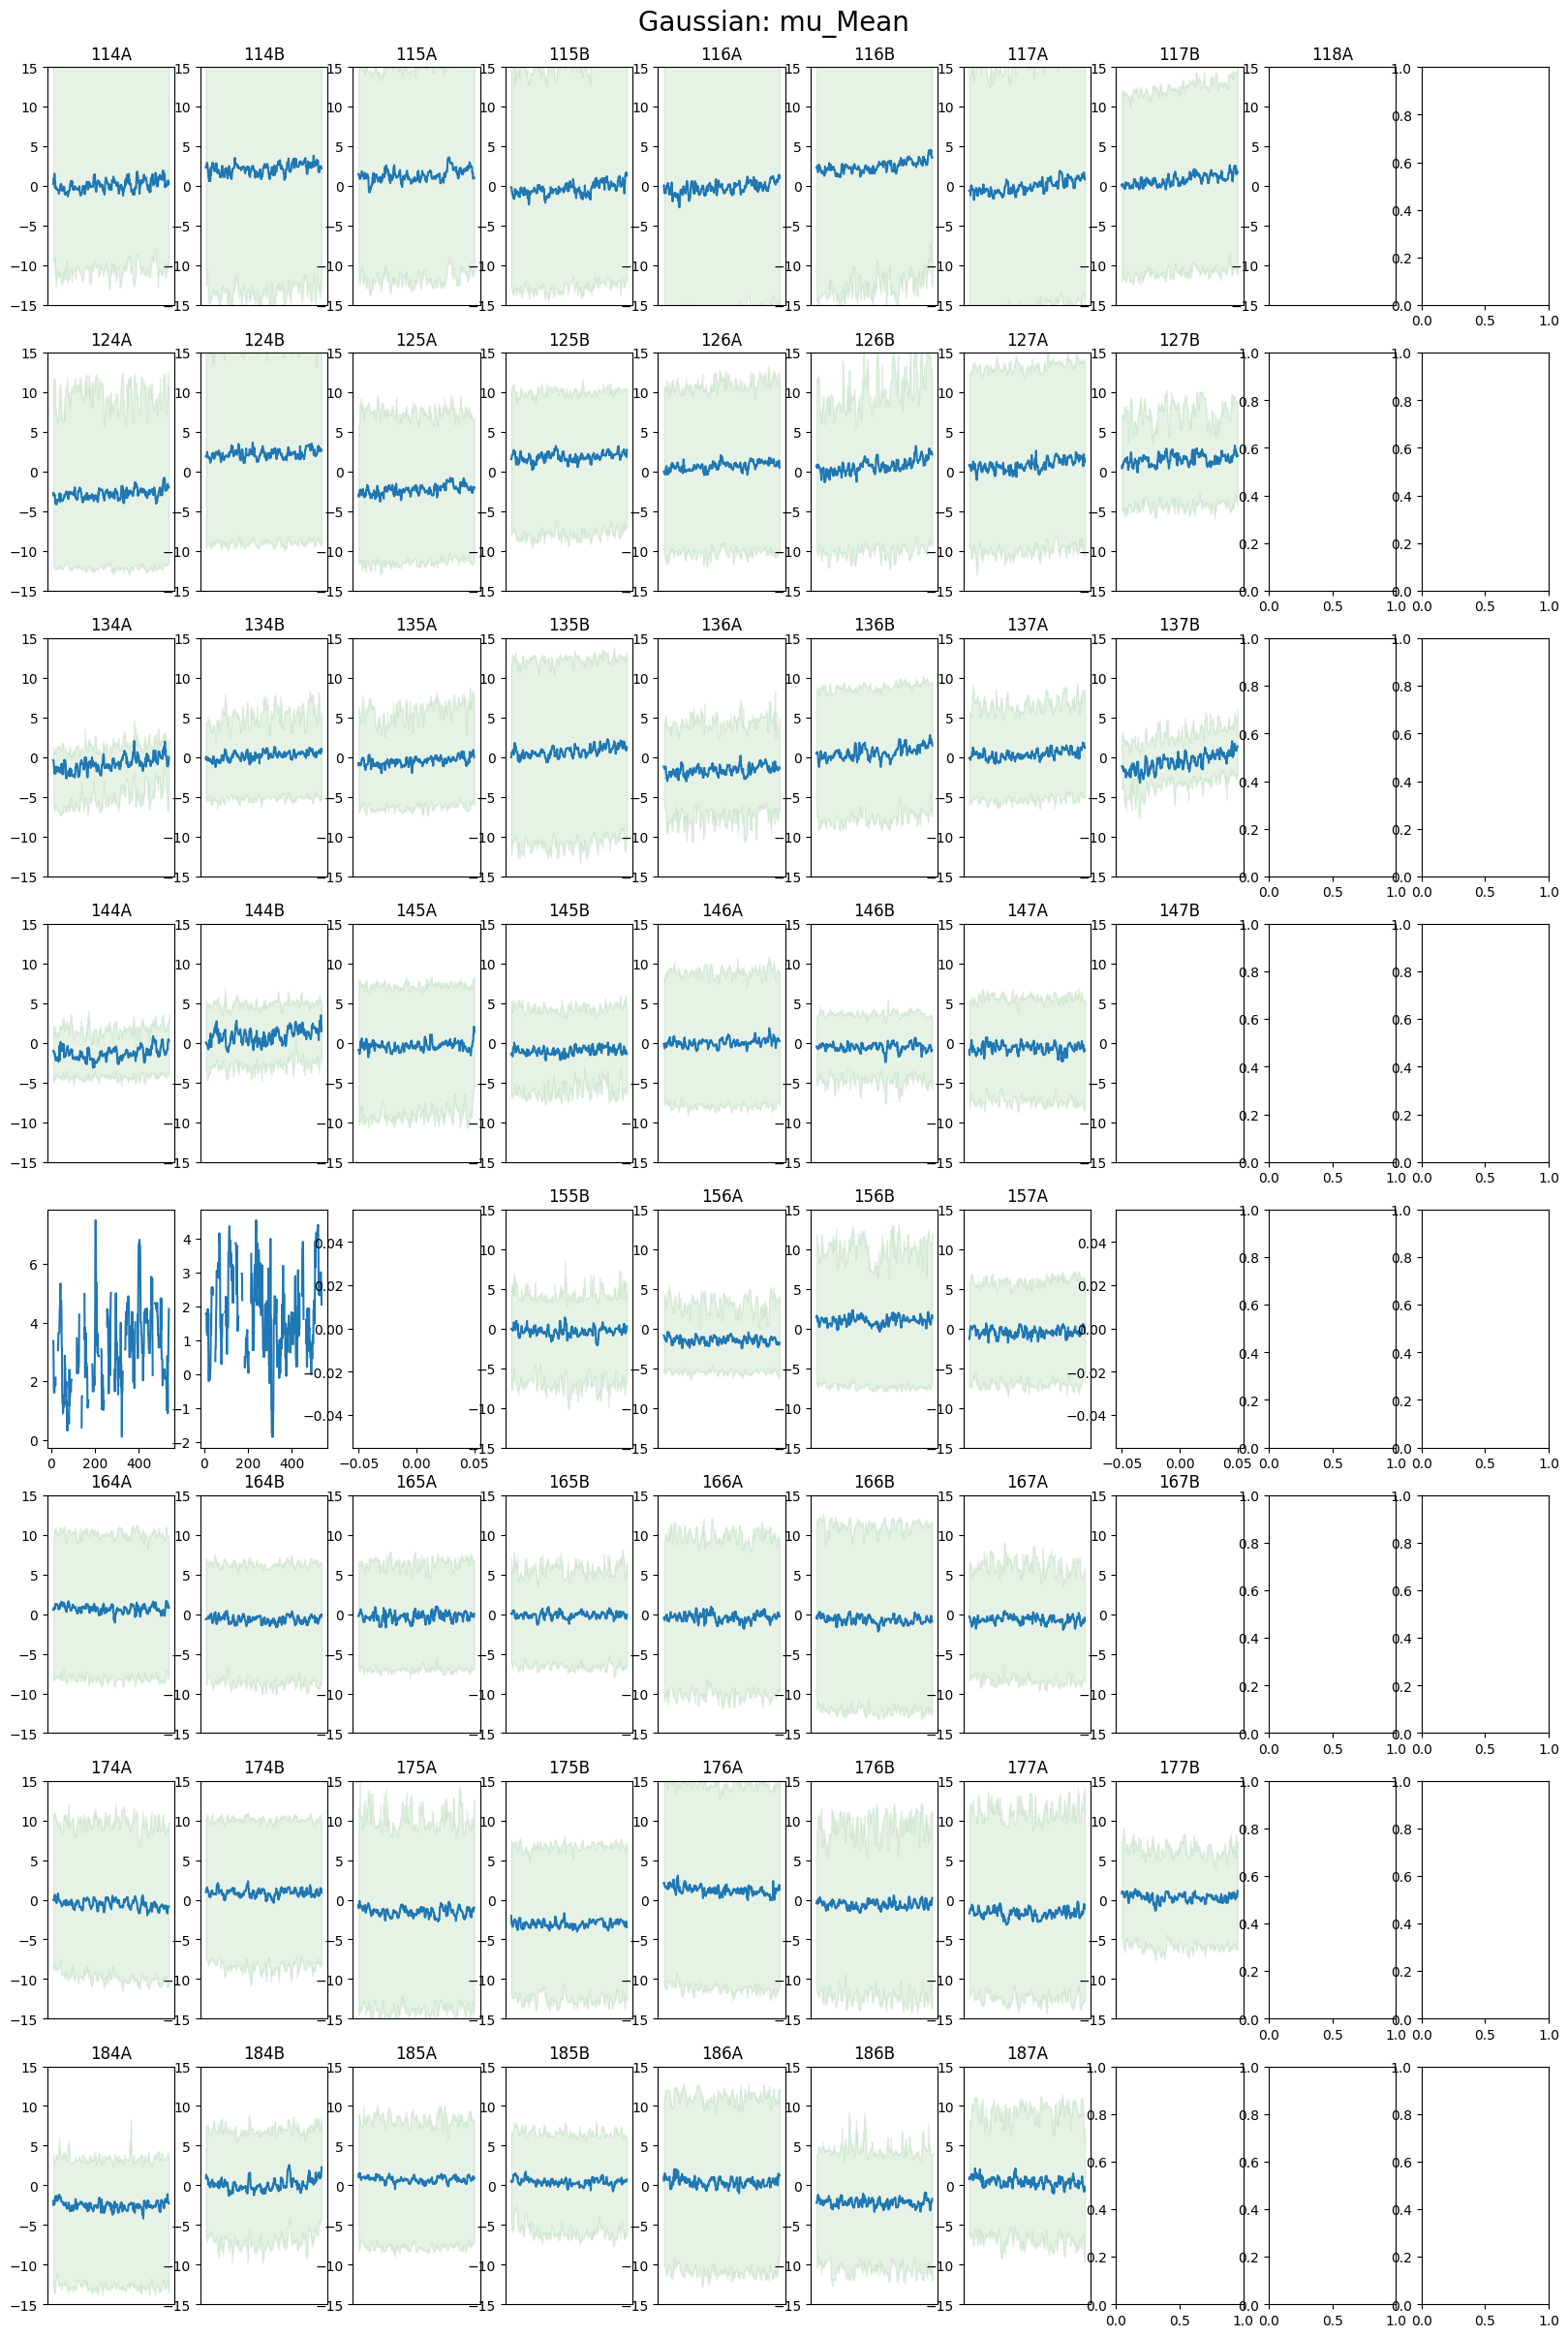

In [55]:
# Variable to plot (see column headings for available variables)
variable = 'mu'
technique = 'Mean'

# Y-axis range
vmin = -15
vmax = 15

data_name = f'{variable}_{technique}'

parent_filepath = Path(root, 'Results', '1_gratings')
filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

paired_prefixes = []
for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'1_gratings/{p}_S.csv', f'1_gratings/{p}_N.csv'))

parent_filepath = Path(root, 'Results', '2_gratings')
filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'2_gratings/{p}_S.csv', f'2_gratings/{p}_N.csv'))

# Calculate lowest column number and how many rows and cols needed for plot
min_x = 100
xs = set()
ys = set()
for p0, p1 in paired_prefixes:
    min_x = np.min([min_x, int(p0.split('/')[1][2:3]), int(p1.split('/')[1][2:3])])
    xs.add(int(p0.split('/')[1][2:3]))
    ys.add(int(p0.split('/')[1][:2]))

fig, ax = plt.subplots(len(ys), len(xs) * 2, figsize=(20, 30))
for p0, p1 in paired_prefixes:
    ax_idx_y = int(p0.split('/')[1][:2]) - int(paired_prefixes[0][0].split('/')[1][:2])
    if 'A' in p0.split('/')[1]:
        ax_idx_x = (int(p0.split('/')[1][2:3]) - min_x) * 2
    else:
        ax_idx_x = ((int(p0.split('/')[1][2:3]) - min_x) * 2) + 1
    df1 = pd.read_csv(Path(root, 'Results', p0)).set_index('Time Stamp')
    df2 = pd.read_csv(Path(root, 'Results', p1)).set_index('Time Stamp')
    df3 = (df1[data_name] + df2[data_name]) - (df1[data_name].iloc[0] + df2[data_name].iloc[0])
    df5 = ((df1[f'{variable}_UQ'] + df2[f'{variable}_UQ'])) - (df1[data_name].iloc[0] + df2[data_name].iloc[0])
    df4 = ((df1[f'{variable}_LQ'] + df2[f'{variable}_LQ'])) - (df1[data_name].iloc[0] + df2[data_name].iloc[0])
    try:
        ax[ax_idx_y][ax_idx_x].plot(df3.rolling(window=10).median())
        ax[ax_idx_y][ax_idx_x].fill_between(df1.index, df4.rolling(window=10).median(), df5.rolling(window=10).median(), color='green', alpha=0.1)
        ax[ax_idx_y][ax_idx_x].set_title(df1['ROI-label'].iloc[0][:-2])
        ax[ax_idx_y][ax_idx_x].set_ylim([vmin, vmax])
        ax[ax_idx_y][ax_idx_x].set_xticks([])
    except Exception as e:
        print(f'Exception: {e}')
fig.suptitle(f'Gaussian: {data_name}', fontsize=20, y=0.9)
# plt.show()
plt.savefig(Path(root, 'Results', 'Gaussian_Mu_Mean_Analysis.png'), dpi=300, bbox_inches='tight')

## Plot heat-map of gratings, averaged over certain x-values

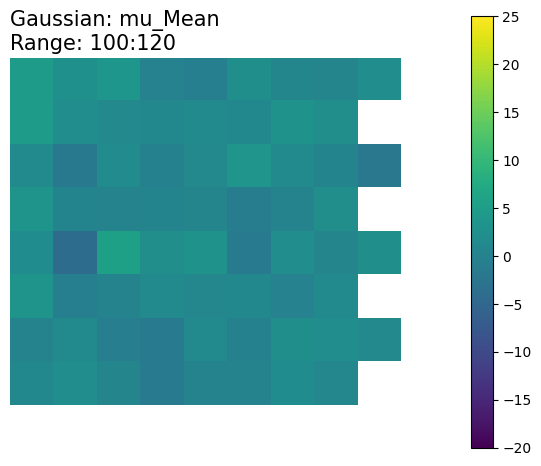

In [43]:
# Variable to plot (see column headings for available variables)
variable = 'mu'
technique = 'Mean'

# Range to average over
lower = 100
upper = 120

# Colorbar range
vmin = -20
vmax = 25

data_name = f'{variable}_{technique}'

parent_filepath = Path(root, 'Results', '1_gratings')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

paired_prefixes = []
for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'1_gratings/{p}_S.csv', f'1_gratings/{p}_N.csv'))

parent_filepath = Path(root, 'Results', '2_gratings')

filelist = list(parent_filepath.glob('*.csv'))
file_prefixes = set([f.stem[:-2] for f in filelist])
file_prefixes = sorted(file_prefixes)

for p in file_prefixes:
    file1_exists = Path(parent_filepath, f'{p}_S.csv').is_file()
    file2_exists = Path(parent_filepath, f'{p}_N.csv').is_file()
    
    if file1_exists and file2_exists:
        paired_prefixes.append((f'2_gratings/{p}_S.csv', f'2_gratings/{p}_N.csv'))

dfs = {}  # Dictionary to store all dataframes
min_x = 100
xs = set()
ys = set()
for p0, p1 in paired_prefixes:
    df1 = pd.read_csv(Path(root, 'Results', p0)).set_index('Time Stamp')
    df2 = pd.read_csv(Path(root, 'Results', p1)).set_index('Time Stamp')
    dfs[(p0, p1)] = (df1[data_name] + df2[data_name]) - (df1[data_name].iloc[0] + df2[data_name].iloc[0])
    min_x = np.min([min_x, int(p0.split('/')[1][2:3]), int(p1.split('/')[1][2:3])])
    xs.add(int(p0.split('/')[1][2:3]))
    ys.add(int(p0.split('/')[1][:2]))

data = np.full([len(ys), len(xs) * 2], np.nan)

for p0, p1 in paired_prefixes:
    ax_idx_0 = (-1 * ((int(paired_prefixes[0][0].split('/')[1][:2])) - int(p0.split('/')[1][:2])))
    if 'A' in p0.split('/')[1]:
        ax_idx_1 = (int(p0.split('/')[1][2:3]) - min_x) * 2
    else:
        ax_idx_1 = ((int(p0.split('/')[1][2:3]) - min_x) * 2) + 1
    data[ax_idx_0][ax_idx_1] = dfs[(p0, p1)].iloc[lower:upper].mean()

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.axis('off')
ax.set_title(f'Gaussian: {data_name}\nRange: {lower:03d}:{upper:03d}', loc='left', fontsize=15)
im = ax.imshow(data, aspect='equal', interpolation='nearest', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
plt.show()
# plt.savefig(Path(root, 'Results', 'Gaussian_Mu_Mean_Snalysis_INVERTED.png'), dpi=300, bbox_inches='tight')

## Make color video of resonance position

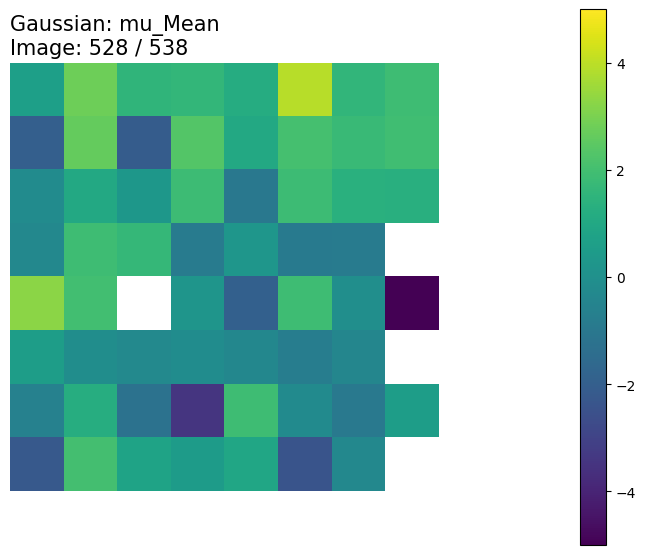

In [56]:
# Variable to plot (see column headings for available variables)
variable = 'mu'
technique = 'Mean'

# Colorbar range
vmin = -5
vmax = 5

# Rolling window over which to perform average
window = 10

# Starting frame/image and ending frame/image (useful for cutting out 'flat' data)
starting_num = 0
ending_num = 538


video_filepath = Path(root, 'Results', f'Gaussian_Mu_Mean_HeatMap_win{window}.mp4')
data_name = f'{variable}_{technique}'
writer = FFMpegWriter(fps=30)

fig, ax = plt.subplots(1, 1, figsize=(7, 7), layout='tight')
ax.axis('off')
ax.set_title(f'Gaussian: {data_name}\nImage: {starting_num:03d} / {ending_num}', loc='left', fontsize=15)

dfs = {}  # Dictionary to store all dataframes
min_x = 100
xs = set()
ys = set()
for p0, p1 in paired_prefixes:
    df1 = pd.read_csv(Path(root, 'Results', p0)).set_index('Time Stamp')
    df2 = pd.read_csv(Path(root, 'Results', p1)).set_index('Time Stamp')
    dfs[(p0, p1)] = (df1[data_name] + df2[data_name]) - (df1[data_name].iloc[0] + df2[data_name].iloc[0])
    min_x = np.min([min_x, int(p0.split('/')[1][2:3]), int(p1.split('/')[1][2:3])])
    xs.add(int(p0.split('/')[1][2:3]))
    ys.add(int(p0.split('/')[1][:2]))

data = np.full([len(ys), len(xs) * 2], np.nan)

for p0, p1 in paired_prefixes:
    ax_idx_0 = (-1 * ((int(paired_prefixes[0][0].split('/')[1][:2])) - int(p0.split('/')[1][:2])))
    if 'A' in p0.split('/')[1]:
        ax_idx_1 = (int(p0.split('/')[1][2:3]) - min_x) * 2
    else:
        ax_idx_1 = ((int(p0.split('/')[1][2:3]) - min_x) * 2) + 1
    data[ax_idx_0][ax_idx_1] = dfs[(p0, p1)].iloc[0]

img_chirp = ax.imshow(data, aspect='equal', interpolation='none', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(img_chirp, ax=ax, shrink=0.8)

with writer.saving(fig, video_filepath, dpi=100):
    for idx in range(starting_num, ending_num + 1 - window):
        for p0, p1 in paired_prefixes:
            ax_idx_0 = (-1 * ((int(paired_prefixes[0][0].split('/')[1][:2])) - int(p0.split('/')[1][:2])))
            if 'A' in p0.split('/')[1]:
                ax_idx_1 = (int(p0.split('/')[1][2:3]) - min_x) * 2
            else:
                ax_idx_1 = ((int(p0.split('/')[1][2:3]) - min_x) * 2) + 1

            try:
                data[ax_idx_0][ax_idx_1] = dfs[(p0, p1)].iloc[idx:idx + window].mean()
            except IndexError as e:
                print(f'[ERROR] Index error at {e}')
                data[ax_idx_0][ax_idx_1] = 0

        img_chirp.set_data(data)
        ax.set_title(f'Gaussian: {data_name}\nImage: {idx:03d} / {ending_num}', loc='left', fontsize=15)

        writer.grab_frame()
        print(f'Frame {idx + 1} of {ending_num} written', end='\r')